# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

Dataset here : https://www.batadal.net/data.html You will need Training Dataset 1, Training Dataset 1 and Test Dataset.

## Group Number : 27

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Run the code fragment for each task separately

## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import familiarization as fam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = fam.load_data("data/BATADAL_dataset03.csv")
tdata = fam.pre_process(data)

# Plot sample signals
print("\nFigure 1: types of signals in dataset")
fam.plot_signal(tdata,"L_T1",0,720,"Water level of tank 1","blue")
fam.plot_signal(tdata,"F_PU1",0,720,"Flow through pump 1","green")
fam.plot_signal(tdata,"S_PU2",0,720,"Status of pump 2","red")
fam.plot_signal(tdata,"P_J280",0,720,"Pressure of joint 280","black")

# Determine and plot correlation between signals
print("\nFigure 2: correlation between signals")
fam.plot_correlation(tdata)

# Example of almost perfectly correlated signals
print("\nFigure 3: perfectly correlated signals")
fam.plot_signal(data,"F_PU2",0,720,"Flow in pump 2","blue")
fam.plot_signal(data,"S_PU2",0,720,"Status of pump 2","red")

# Example of almost perfectly negatively correlated signals
print("\nFigure 4: perfectly negatively correlated signals")
fam.plot_signal(data,"F_PU1",0,720,"Flow in pump 1","blue")
fam.plot_signal(data,"F_PU2",0,720,"Flow in pump 2","red")

# Example of almost perfectly negatively correlated signals
print("\nFigure 5: prediction of the water tank signals")
signals = ["L_T1", "L_T2", "L_T3", "L_T4", "L_T5", "L_T6", "L_T7"]
rmse = list()
for signal in signals:
    rmse.append(fam.predict_signal(data,signal,0.9))
print("Average RMSE:",np.mean(rmse))


Figure 1: types of signals in dataset


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>


Figure 2: correlation between signals


<Figure size 2500x2000 with 2 Axes>


Figure 3: perfectly correlated signals


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>


Figure 4: perfectly negatively correlated signals


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>


Figure 5: prediction of the water tank signals


<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

<Figure size 2200x300 with 1 Axes>

Average RMSE: 0.2850589383381013


### 1b. Answers to the three questions

SCADA is a system/network of software and hardware components in which the data from sensors and other industrial components like pumps and valves can be monitored and controlled from a centralized computer. These kind of systems are vunerable to cyber-physical attacks.

The BATADAL dataset is a representation of (measured) data over time from tanks (7), pumps (11), valves (4, of which 1 actionable), and other hydraulic components like joints (12 in total) from the C-Town water distribution system. The information that is embedded in the dataset contains the water level in each tank, the flow through each pump and valve and their status at that time (0 for off, 1 for on), and the pressure in the joints. Each record additionally stored the date and hour, and the attack flag status (0 for no attack, 1 for attack, and -999 as unknown(?)).

##### Signal types
The signals that can be extracted from the dataset thus are the levels in the water tank, the flow through the pumps and valves, the status of each pump/valve over time, and the pressure in the joints. In Figure 1 all four signals can be seen over about a month in time for illustration purpose only. We can clearly see that the patterns for all signals are between boundaries, and look like to be repeating/cyclic in some form. We also see that the status indeed switches from off and on, although the value is only measured once every hour.

##### Correlation
To see if the signals are correlated we can determine the correlation between any columns in the dataset, and create a heatmap to easily visualize the correlation (see Figure 2). We see that most signals have a no correlation (value +-0), while there exist some perfect correlated signals (excluding the signals with theirselves) and perfect negatively correlated signals (signals move in opposite direction). For example the correlation of the flow of pump 2 (F_PU2) with the status of pump 2 (S_PU2) is 0.998614, meaning they are perfectly correlated. This is ofcourse not strange since if the pump is enabled (status code 1) the flow in the pump is also enabled, see Figure 3 for pattern comparison of a part of the signals. If we look at other signals (that are not from the same component), we see that for instance the flow in pump 1 is almost perfectly correlated with the pressure in joint 280, with a correlation value of 0.907052. This probably indicates that joint 280 is the connection leaving pump 2, while it is connected to something that is not flowing at the same speed as pump 2. We also see (Figure 4) that for instance the signals from F_PU1 and F_PU2 are perfectly negatively correlated with a value of -0.949012, meaning that when the signal from one of the two is going up or down, the other one is moving in the opposite direction. 

From the signals we can easily see that they look to be cyclic. From the flow in pump 2 signals in Figure 3 we see that in 24 hours (although it is measured ones per hour) the frequency of the signal repeating is about 14 times. The cycle is not a perfect sinusoidal, but the similarity between them is very well visible.

###### Prediction
For the prediction of the signals we use an AutoRegression model that is trained by a training set, and for the prediction it takes previous observation(s) of the time series into account. The lag has been chosen to be closer to zero and not bigger since the more recent previous observations should be more important than extra previous observations (adding more lag decreases the influence of all other observations). In Figure 5 the original and predicted signals of the water tanks can be seen, including their RMSE. We can see that for all signals did well, although for signals L_T4, L_T5 and L_T7 the prediction is less accurate than for the others. If we compare signals L_T1 and L_T6, at first sight L_T1 looks like to be predicted better by a lot. If we look at the RMSE the difference is just a fraction.

If instead of the water levels of the tanks we try to predict the signals of the flows of the 11 pumps, the result is very different. The average RMSE is increased to 7.59, and the predicted signal does not follow the curves of the original signal at all for most signals.

Predicting the next value in a series thus differs if the signal is applicable for it. From what we've seen is that the water levels in the tanks are very fitting for prediction, while the flow in the pumps are not.


## 2. LOF task – 1/2 A4 – Individual - Lennart

### 2a. Plot LOF scores

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')


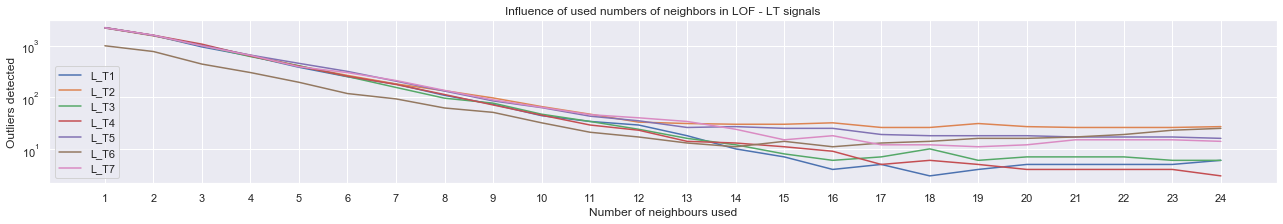

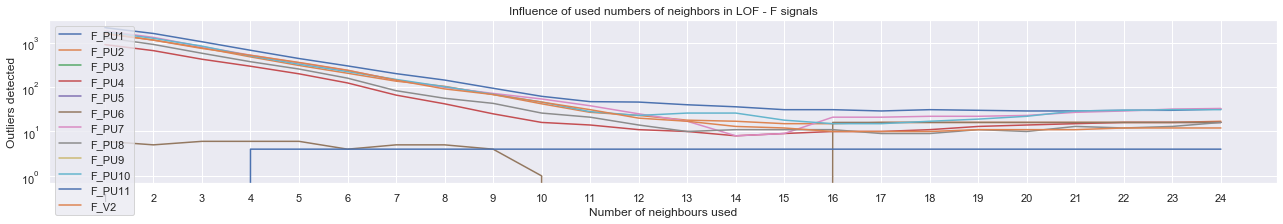

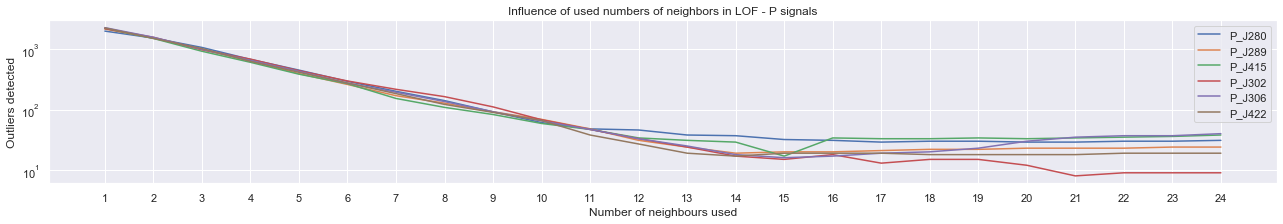

In [4]:
import familiarization as fam
import anomaly_detection as dtc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

data = fam.load_data("data/BATADAL_dataset03.csv")
# Drop sequential context
data = data.drop(['DATETIME'], axis = 1) 
lof_data = [ [] for _ in range(len(data['P_J306'])) ]
print(data.columns)
# Pick some random signals of different classes 
# LT_signals = ['L_T1', 'L_T3', 'L_T5', 'L_T6', 'L_T7']
LT_signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']
# F_signals = ['F_PU1', 'F_PU4', 'F_PU7',  'F_PU8','F_PU10', 'F_PU11', 'F_V2',]
F_signals = ['F_PU1', 'F_PU2','F_PU3', 'F_PU4','F_PU5','F_PU6', 'F_PU7', 'F_PU8', 'F_PU9', 'F_PU10', 'F_PU11', 'F_V2']
P_signals = ['P_J280',  'P_J289', 'P_J415', 'P_J302', 'P_J306',  'P_J422']
# Define the maximial amount of nearest neighbours to use in the LOF method
max_neighbours = 25

# # Compute and plot for each signal the LOF performance
LT_lof = dtc.compute_lof(data, LT_signals, max_neighbours)
dtc.plot_lof(LT_lof, LT_signals, max_neighbours, "Influence of used numbers of neighbors in LOF - LT signals")

F_lof = dtc.compute_lof(data, F_signals, max_neighbours)
dtc.plot_lof(F_lof, F_signals, max_neighbours, "Influence of used numbers of neighbors in LOF - F signals")

P_lof = dtc.compute_lof(data, P_signals, max_neighbours)
dtc.plot_lof(P_lof, P_signals, max_neighbours, "Influence of used numbers of neighbors in LOF - P signals")

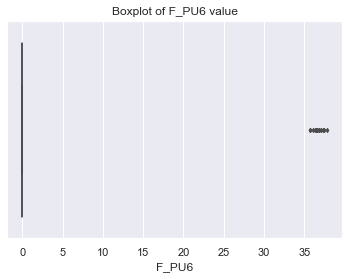

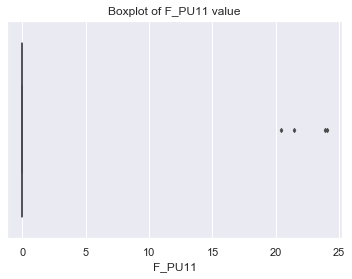

In [3]:
# Only used for clarification of the performance of the LOF 
sns.boxplot(data['F_PU6'], fliersize=3)
plt.title("Boxplot of F_PU6 value")
plt.show()
sns.boxplot(data['F_PU11'], fliersize=3)
plt.title("Boxplot of F_PU11 value")
plt.show()

### 2b. Analysis and answers to the questions

For each type of signal(L_T, F, P), 50 percent of the signals are used to evaluate the performance of LOF. To test the influence of the number of neighbors used in the algorithm on the number of anomalies detected, the number of neighbors is plotted as a function of the number of anomalies detected. The amount of neighbors used is chosen from 1 till 25. The upper bound is chosen because in the documentation of the SK-Learn package it is stated that "20 appears to work well in general". To see if the performance could be increased when using a larger value than 20, the upper bound is set to 25. Another variable that has an impact on the performance of LOF is the threshold used to decide whether a data point is an anomaly. Several values are used and -1.5 was chosen as the final threshold value.

From the plots above it can be seen that indeed the upper bound of the number of neighbors used could be set to 20 since the number of anomalies detected does not change anymore. An even smaller number of neighbors, approximately 16, could be used for the F and P signal types because it already converged to a stable.
Remarkable are the F_P06 and the F_PU11 signals because they follow a different pattern as can be seen in the second plot. If we look at the data points of these two signals in Figure X the behavior could relatively easily be explained. 

As can be seen in the bottom boxplot it consists of four points with a value close to each other and all other points have a value of 0. In the LOF plot it can be seen that when 3 or fewer neighbors are used these points are not seen as outliers because they form a cluster by themself. However, when a higher amount of neighbors is used these are classified as outliers because it uses the distance of a data point with value 0. This results in detecting the four points as outliers.
Approximately, the same reasoning could be used for the behavior of the L_PU6 line. Although, the number of neighbors to reach this is 16.

A value of 20 would be a suitable value. Since all signals are converged to a stable solution.

Abnormalities training data

What kind of anomalies detect by LOF


## 3. PCA task – 1/2 A4 – Individual - Joost

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual - Joost

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual - Lennart

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.